# Task
### Objective
 To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.

### Task:
1. use K-means clustering and Hierarchical clustering to cluster the country into groups.
please choose the number of the cluster in a rational reason
2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively
3. please write the suggestion to CEO about the country you suggest




In [11]:
#IMPORTS
import numpy as np
import pandas as pd

#Create dataframe
df  = pd.read_csv("country.csv")


# Set up
### Data cleaning

In [12]:
#Check for null cells
df.isnull().sum()

#No null cells, can continue

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Preprocessing

In [13]:
#Ignore column "country" cause it is not numeric and therefore can't be used for clustering.
numeric_col = ["child_mort", "exports" ,"health" ,"imports","income","inflation","life_expec","total_fer","gdpp"]
num_df = df[numeric_col]
num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


(array([[151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 81.,  31.,  17.,  14.,   3.,   1.,   2.,   1.,   0.,   1.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [105.,  17.,   9.,  13.,   3.,   2.,   0.,   1.,   1.,   0.]]),
 array([-4.21000000e+00,  1.24962110e+04,  2.49966320e+04,  3.74970530e+04,
         4.99974740e+04,  6.24978950e+04,  7.49983160e+04,  8.74987370e+04,
         9.99991580e+04,  1.12499579e+05,  1.25000000e+05]),
 <a list of 9 BarContainer objects>)

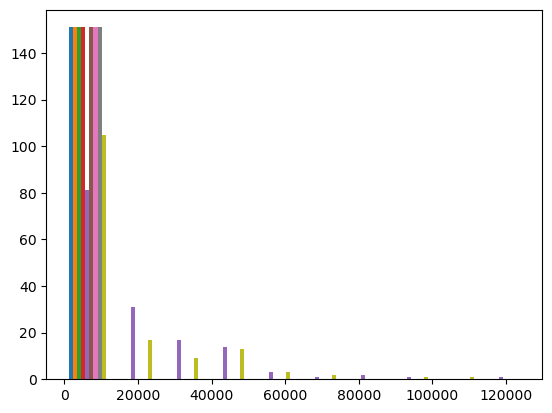

In [14]:
#Visualize pre-scaled features by showing histogram
import matplotlib.pyplot as plt
plt.hist(num_df, bins=10)

In [15]:
#Scale data
#Data needs to be scaled so distance can be calculated correctly (because GDP is much larger than life expectancy for example)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#fit and transform data
temp = scaler.fit_transform(num_df)
#turn transformed data back into a dataframe
scaled_df = pd.DataFrame(temp, columns=num_df.columns)


(array([[ 0.,  0., 84., 39., 22.,  5.,  1.,  0.,  0.,  0.],
        [ 0.,  0., 66., 67., 15.,  0.,  2.,  1.,  0.,  0.],
        [ 0.,  2., 61., 59., 26.,  2.,  1.,  0.,  0.,  0.],
        [ 0.,  1., 61., 72., 13.,  1.,  2.,  1.,  0.,  0.],
        [ 0.,  0., 76., 52., 17.,  4.,  1.,  1.,  0.,  0.],
        [ 0.,  0., 61., 76., 11.,  2.,  0.,  0.,  0.,  1.],
        [ 1.,  8., 37., 75., 30.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 73., 44., 30.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 85., 42., 19.,  3.,  1.,  1.,  0.,  0.]]),
 array([-4.30591416, -2.99631236, -1.68671055, -0.37710875,  0.93249305,
         2.24209485,  3.55169665,  4.86129845,  6.17090025,  7.48050206,
         8.79010386]),
 <a list of 9 BarContainer objects>)

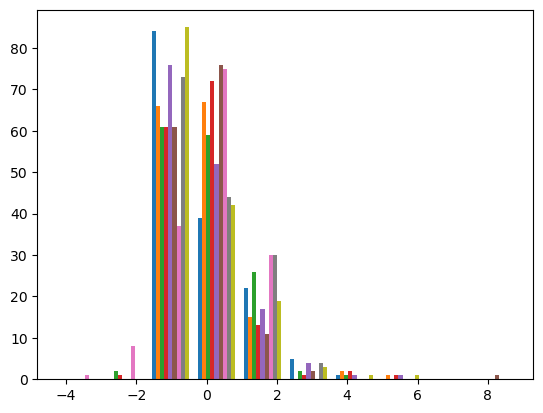

In [16]:
#Visualize scaled features by showing histogram
plt.hist(scaled_df, bins=10)

# 1: K-means clustering & Hierarchical clustering


## Find optimal number of clusters

## K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
k = 4  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
print(kmeans_labels)

[3 1 1 0 1 0 3 3 3 1 1 3 3 1 1 3 1 3 3 3 1 1 3 1 3 3 3 0 3 3 3 3 1 3 3 1 3
 3 3 3 0 1 3 0 0 0 1 1 0 3 1 1 1 3 0 3 0 0 3 3 3 1 3 3 3 0 1 1 0 0 3 1 3 3
 3 3 2 3 0 0 3 1 3 1 1 3 0 3 0 3 3 1 3 0 3 2 3 0 3 3 1 1 3 0 0 1 3 3 3 0 3
 2 3 3 1 3 3 0 0 1 3 0 1 3 3 3 1 1 3 3 1 3 3 1 1 1 3 3 3 0 0 3 1 1 3 1 0 3
 3 3 3]


## Hierarchical clustering

# 2: PCA and Visualization

# 3: Suggestion
I suggest we split the 10$ Million according to: